In [1]:
#Loading the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#Importing the quartely divided dataset
quarter_dom_ES = pd.read_csv('C:\\Users\\PCView\\Desktop\\Research_code\\Research-Models\\Data\\quarter_data_domestic.csv')
quarter_dom_ES.head(10)

,Year,DomesticDebt_adjust
0,1990-03-31,14337.301563
1,1990-06-30,14002.819688
2,1990-09-30,14331.459062
3,1990-12-31,15323.219687
4,1991-03-31,16978.101563
5,1991-06-30,15833.919688
6,1991-09-30,15352.859062
7,1991-12-31,15534.919687
8,1992-03-31,16380.101563
9,1992-06-30,17557.744688


In [3]:
#Checking for null values
quarter_dom_ES.isnull().sum()

Year                   0
DomesticDebt_adjust    0
dtype: int64

* As per the results above there are no null values in the decomposed dataset.

In [4]:
#Checking for duplicates
quarter_dom_ES.duplicated().sum()

0

* As shown above there are no duplicate values.

In [5]:
quarter_dom_ES.shape

(125, 2)

In [6]:
quarter_dom_ES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 125 non-null    object 
 1   DomesticDebt_adjust  125 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.1+ KB


In [7]:
quarter_dom_ES=quarter_dom_ES.set_index('Year ')
is_year_index = 'Year ' in quarter_dom_ES.index.names
print(is_year_index)

True


In [8]:
train, test = train_test_split(quarter_dom_ES, train_size = 0.8, random_state = 42) 

In [9]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.fit_transform(test)

In [10]:
#Creating the exponential smoothing model
model = ExponentialSmoothing(train_scaled, trend='add', seasonal='add', seasonal_periods=12)

In [11]:
#Fitting the model
model_fit = model.fit()

# Split the data into training and testing sets
train_data, test_data = train_test_split(quarter_dom_ES['DomesticDebt_adjust'], train_size=0.8)

In [12]:
#Making predcitions to check the model accuracy
forecast = model.predict(start=len(train_scaled), end=len(train_scaled)+len(test_scaled)-1,params=model_fit.params)
forecast_original = scaler.inverse_transform([forecast])
forecast_original
#Making predictions from the ES model to check model accuracy
#preds = model_fit.forecast(71)
#preds

array([[294437.91294105, 255242.12736988, 222630.2528119 ,
        407332.77237308, 392110.09053123, 369741.59997395,
        269208.04868797, 172828.34399618, 875401.08841075,
        300513.8076523 , 245674.97126595, 343503.14218981,
        310918.22742108, 271722.44184991, 239110.56729193,
        423813.08685311, 408590.40501126, 386221.91445397,
        285688.363168  , 189308.6584762 , 891881.40289078,
        316994.12213232, 262155.28574598, 359983.45666984,
        327398.5419011 ]])

In [13]:
test_scaled.shape

(25, 1)

In [14]:
forecast.shape

(25,)

In [15]:
# Calculating mean absolute error (MAE)
mae = mean_absolute_error(test_scaled, forecast)

# Calculating mean squared error (MSE)
mse = mean_squared_error(test_scaled, forecast)

# Calculating root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Calculating mean absolute percentage error (MAPE)
mape = np.mean(np.abs((test_scaled - forecast) / test_scaled)) * 100

# Printing the computed metrics
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)

MAE: 0.7895742813626172
MSE: 1.3183416030591724
RMSE: 1.148190577848108
MAPE: 155.81499938654449


In [16]:
#Making predictions from the ES model for the next 8 years
start_date = '2020'
end_date = '2028'
#date_range = pd.date_range(start=start_date, end=end_date, freq='Q')
date_range = pd.date_range(start=start_date, end=end_date, freq='Y')
forecast_mod = model.predict(start=len(train_scaled)+len(test_scaled), end=len(train_scaled)+len(test_scaled)+len(date_range)-1,params=model_fit.params)
forecast_original = scaler.inverse_transform([forecast_mod]).reshape(-1,1).flatten()
#forecast_original = forecast_mod
forecast_index = pd.DatetimeIndex(date_range)
forecast_df = pd.DataFrame(forecast_original, index=forecast_index, columns=['DomesticDebt_adjust'])
forecast_df

,DomesticDebt_adjust
2020-12-31,288202.756330
2021-12-31,255590.881772
2022-12-31,440293.401333
2023-12-31,425070.719491
2024-12-31,402702.228934
2025-12-31,302168.677648
2026-12-31,205788.972956
2027-12-31,908361.717371


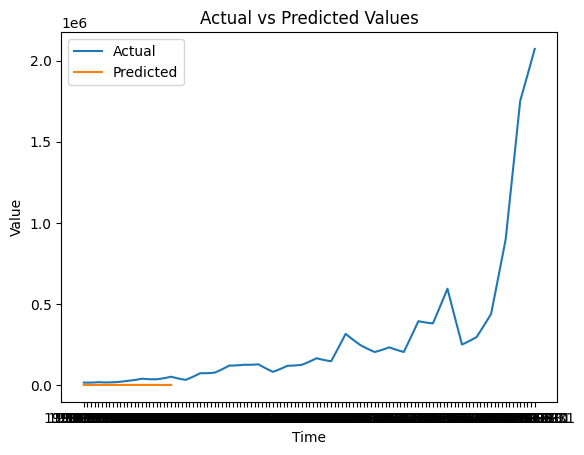

In [17]:
actual_values = quarter_dom_ES['DomesticDebt_adjust']

# Plotting the actual values and predicted values

#plt.figure(figsize=(20, 6)) 
plt.plot(actual_values, label='Actual')
plt.plot(forecast, label='Predicted')

#plt.plot(quarter_dom_ES, label='Actual')
#plt.plot(forecast, label='Predicted')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()

plt.show()